### Import libraries and load dataset

Using TensorFlow backend.


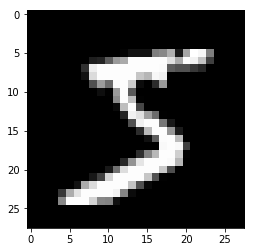

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data('/tmp/mnist.npz')

plt.imshow(X_train[0], cmap='gray')

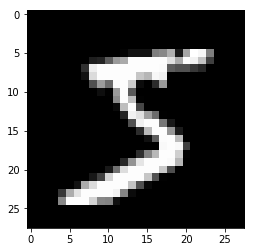

In [2]:
from keras.utils.np_utils import to_categorical

X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

y_train.shape

plt.imshow(X_train[0,:,:,0], cmap='gray')
i = 8

### Build our model

In [36]:
from keras.layers import Flatten, Activation, Conv2D, MaxPool2D, AvgPool2D, Dense, Dropout
from keras.optimizers import Adam
from keras.models import Sequential
import keras.backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

i=i+1

K.clear_session()

a = EarlyStopping(monitor='val_acc', min_delta=0, patience=5, verbose=1, mode='auto')#will stop the model if val_loss does not improve for 2 consecutive epochs
b = ModelCheckpoint(monitor='val_acc', filepath='../models/course6-'+str(i)+'.hdf5', verbose=1, save_best_only=True)#save model weights after each epoch if val_loss improves
c = TensorBoard(log_dir='./mnist-conv-logs/conv-1layer-'+str(i))#saves a log file for tensorboard; remember to save different runs to different subdirectories
callbacks=[a,b,c]

epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), padding='same'))
model.add(AvgPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(AvgPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(AvgPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Conv2D(256, (3,3), padding='valid'))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
average_pooling2d_1 (Average (None, 14, 14, 32)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
average_pooling2d_2 (Average (None, 7, 7, 64)          0         
_________________________________________________________________
activation_2 (Activation)    (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
__________

Model type | Test accuracy
  ------------- | -------------
  2 conv layers w dropout  | 98.66%, 98.71%
  2 conv layers w dropout w 2 dense | , 98.67 %
  2 conv layers  w/o dropout | 98.60%, 98.59 %
  1 conv layer w dropout | 97.65 %
  4 conv layer w dropout | 98.8 % , 98.36 %
  3 conv layer w dropout | 98.95 % , 98.99 %
  3 conv layer w dropout w 2 dense rmsprop| 98.82 % , 98.72 %, 
  3 conv layer w dropout w 2 dense sgd| 99 %
  3 conv layer w/o dropout w 2 dense sgd|99.0 %
  3 conv layer dense drop dense drop dense sgd|99.11 %, 99.0 %, 99.11 %
  4 conv layer dense drop dense drop dense sgd|99.14 %, 98.92 %

In [37]:
model.fit(X_train, y_train_cat, batch_size=128, epochs=100, validation_split=0.2,verbose=1,callbacks=callbacks)  # starts training

result = model.evaluate(X_test, y_test_cat)

print("Accuracy on test set: ",result[1]*100,"%")


Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 5s 97us/step - loss: 0.5780 - acc: 0.8127 - val_loss: 0.1061 - val_acc: 0.9689

Epoch 00001: val_acc improved from -inf to 0.96892, saving model to ../models/course6-26.hdf5
Epoch 2/100
48000/48000 [==============================] - 4s 93us/step - loss: 0.1230 - acc: 0.9684 - val_loss: 0.1126 - val_acc: 0.9725

Epoch 00002: val_acc improved from 0.96892 to 0.97250, saving model to ../models/course6-26.hdf5
Epoch 3/100
48000/48000 [==============================] - 5s 94us/step - loss: 0.0912 - acc: 0.9770 - val_loss: 0.0592 - val_acc: 0.9840

Epoch 00003: val_acc improved from 0.97250 to 0.98400, saving model to ../models/course6-26.hdf5
Epoch 4/100
48000/48000 [==============================] - 4s 93us/step - loss: 0.0689 - acc: 0.9832 - val_loss: 0.0695 - val_acc: 0.9829

Epoch 00004: val_acc did not improve from 0.98400
Epoch 5/100
48000/48000 [==============================]

In [14]:
from keras.layers import Input, MaxPooling2D, Flatten, Activation, Conv2D, AvgPool2D, Dense, Dropout
from keras.optimizers import SGD
import keras
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
import keras.backend as K


i=i+1

a = EarlyStopping(monitor='val_acc', min_delta=0, patience=5, verbose=1, mode='auto')#will stop the model if val_loss does not improve for 2 consecutive epochs
b = ModelCheckpoint(monitor='val_acc', filepath='../models/course6-mnist-inception-'+str(i)+'.hdf5', verbose=1, save_best_only=True)#save model weights after each epoch if val_loss improves
c = TensorBoard(log_dir='./mnist-conv-logs/mnist-inception-'+str(i))#saves a log file for tensorboard; remember to save different runs to different subdirectories
callbacks=[a,b,c]

K.clear_session()

epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)

input_img = Input(shape = (28, 28, 1))

tower_1 = Conv2D(16, (1,1), padding='same', activation='relu')(input_img)
tower_1 = Conv2D(16, (3,3), padding='same', activation='relu')(tower_1)

tower_2 = Conv2D(16, (1,1), padding='same', activation='relu')(input_img)
tower_2 = Conv2D(16, (5,5), padding='same', activation='relu')(tower_2)

tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(input_img)
tower_3 = Conv2D(16, (1,1), padding='same', activation='relu')(tower_3)

output = keras.layers.concatenate([tower_1, tower_2, tower_3], axis = 3)

conv_1 = Conv2D(96, (3,3), padding='same', activation='relu')(output)
pool_1 = MaxPooling2D((2,2),padding='same')(conv_1)

conv_2 = Conv2D(192, (3,3), padding='same', activation='relu')(pool_1)
pool_2 = MaxPooling2D((2,2),padding='same')(conv_2)

output = Flatten()(pool_2)

dense = Dense(128)(output)

drop = Dropout(0.5)(dense)

out    = Dense(10, activation='softmax')(drop)

model = Model(inputs = input_img, outputs = out)

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 16)   32          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 28, 28, 16)   32          input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 28, 28, 1)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (

In [15]:
model.fit(X_train, y_train_cat, batch_size=128, epochs=100, validation_split=0.2,verbose=1,callbacks=callbacks)  # starts training

result = model.evaluate(X_test, y_test_cat)

print("Accuracy on test set: ",result[1]*100,"%")

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 18s 378us/step - loss: 14.4768 - acc: 0.1017 - val_loss: 14.4499 - val_acc: 0.1035

Epoch 00001: val_acc improved from -inf to 0.10350, saving model to ../models/course6-mnist-inception-16.hdf5
Epoch 2/100
48000/48000 [==============================] - 18s 374us/step - loss: 14.4757 - acc: 0.1019 - val_loss: 14.4499 - val_acc: 0.1035

Epoch 00002: val_acc did not improve from 0.10350
Epoch 3/100
48000/48000 [==============================] - 18s 374us/step - loss: 14.4764 - acc: 0.1019 - val_loss: 14.4499 - val_acc: 0.1035

Epoch 00003: val_acc did not improve from 0.10350
Epoch 4/100
48000/48000 [==============================] - 18s 376us/step - loss: 14.4761 - acc: 0.1019 - val_loss: 14.4499 - val_acc: 0.1035

Epoch 00004: val_acc did not improve from 0.10350
Epoch 5/100
48000/48000 [==============================] - 18s 376us/step - loss: 14.4764 - acc: 0.1019 - val_loss: 14